In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [250]:
from pandas.tools.plotting import lag_plot
from sklearn.linear_model import LinearRegression


In [257]:
bitcoin_df = pd.read_csv('bitcoin.csv', sep=';')

In [259]:
bitcoin_df

,Date,Open,High,Low,Close,Volume,MarketCap
0,22/11/2017,8077.95,8302.26,8075.47,8253.55,3633530000,134851000000
1,21/11/2017,8205.74,8348.66,7762.71,8071.26,4277610000,136967000000
2,20/11/2017,8039.07,8336.86,7949.36,8200.64,3488450000,134167000000
3,19/11/2017,7766.03,8101.91,7694.10,8036.49,3149320000,129595000000
4,18/11/2017,7697.21,7884.99,7463.44,7790.15,3667190000,128425000000
5,17/11/2017,7853.57,8004.59,7561.09,7708.99,4651670000,131026000000
6,16/11/2017,7323.24,7967.38,7176.58,7871.69,5123810000,122164000000
7,15/11/2017,6634.76,7342.25,6634.76,7315.54,4200880000,110667000000
8,14/11/2017,6561.48,6764.98,6461.75,6635.75,3197110000,109434000000
9,13/11/2017,5938.25,6811.19,5844.29,6559.49,6263250000,99029000000


In [242]:
bitcoin = pd.Series.from_csv('bitcoin.csv', sep=';', header=1)
bitcoin = bitcoin.astype(float, errors='ignore')[:365][::-1] # to float and reversed last 365 values 

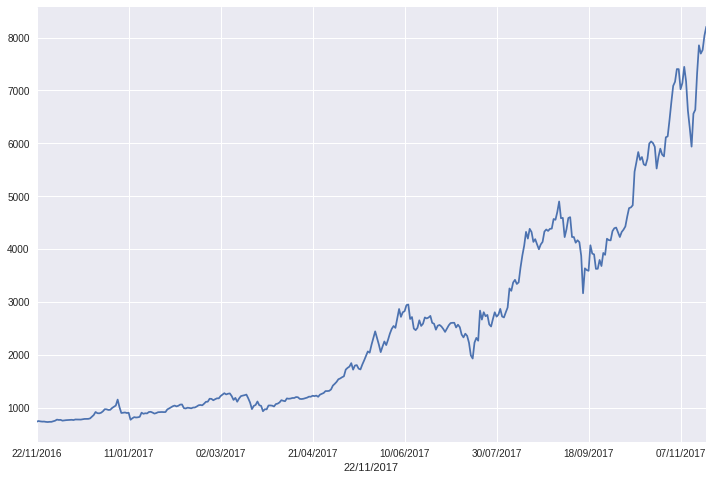

In [245]:
bitcoin.plot();

/home/mikhail/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


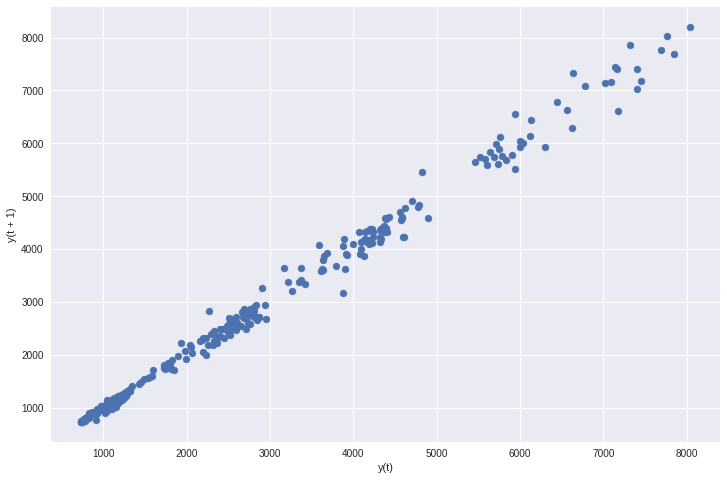

In [249]:
lag_plot(bitcoin);

Видим, что значение цены сильно коррелирует со значением цена на завтра.

## Линейная регрессия

In [ ]:

# X_train, X_test, y_train, y_test = prepareData(bitcoin, test_size=0.3, lag_start=12, lag_end=48)
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} users".format(round(mean_absolute_error(prediction, y_test))))
plt.grid(True);